In [2]:
#Stock Price predictor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# data set downloaded from "https://finance.yahoo.com/quote/GOOG/history"
data = pd.read_csv('GOOG.csv')
data = data.set_index('Date')
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-02-25,30.284985,30.498184,30.147499,30.386105,30.386105,57763704
2014-02-26,30.485731,30.607277,30.230688,30.390341,30.390341,79585191
2014-02-27,30.346006,30.491461,30.311634,30.366428,30.366428,50588912
2014-02-28,30.394573,30.490463,30.042892,30.277761,30.277761,92890878
2014-03-03,30.056091,30.083241,29.692205,29.954971,29.954971,84507572


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 2014-02-25 to 2024-02-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6+ KB


In [5]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data.shape

(2517, 6)

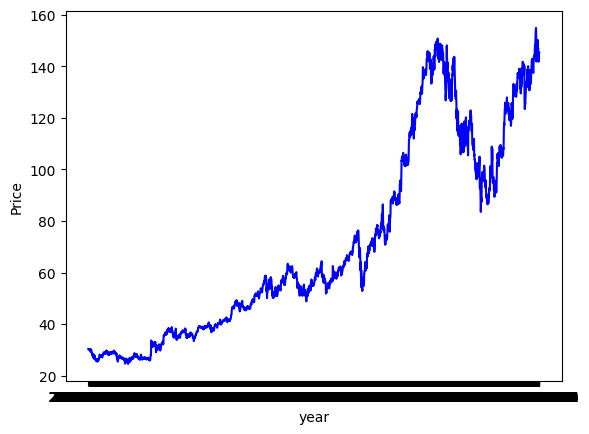

In [7]:
plt.plot(data['Close'],color='b')
plt.ylabel("Price")
plt.xlabel("year")
plt.show()

C:\Users\ogira\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


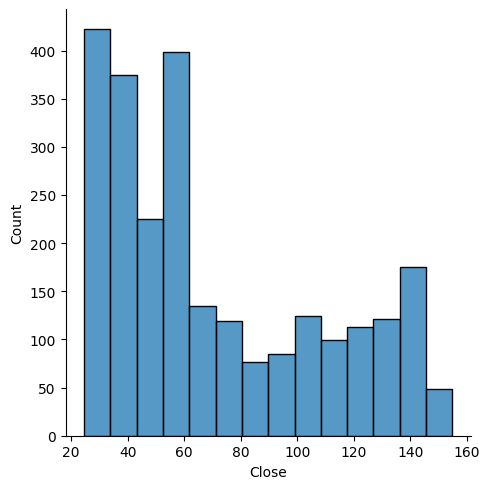

In [8]:
sns.displot(data['Close'])

C:\Users\ogira\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


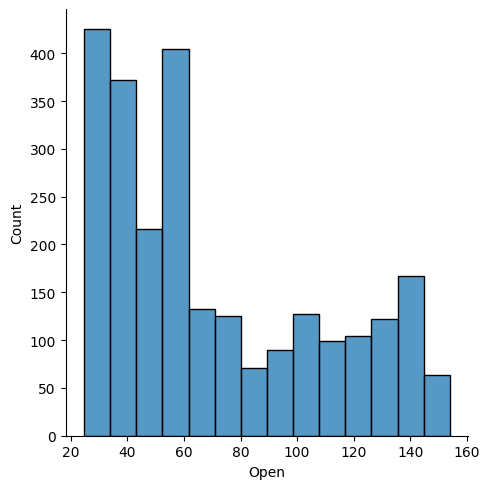

In [9]:
sns.displot(data['Open'])

C:\Users\ogira\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


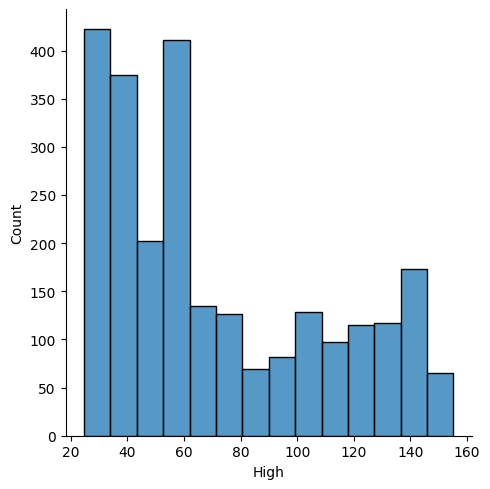

In [10]:
sns.displot(data['High'])

C:\Users\ogira\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


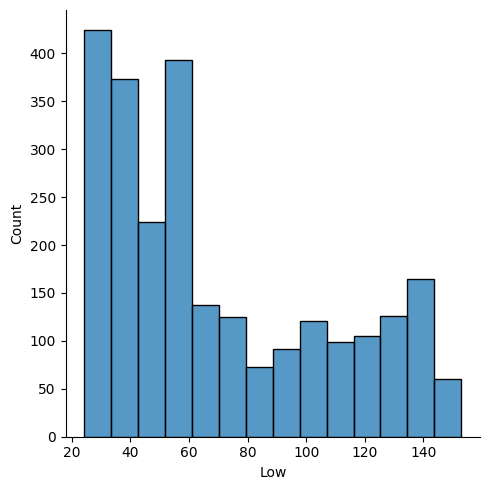

In [11]:
sns.displot(data['Low'])

In [12]:
X=data.drop("Close", axis=1)
Y=data['Close']
#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.15,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2139, 5)
(378, 5)
(2139,)
(378,)


In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
prediction = lr.predict(X_test)

In [14]:
print(Y_test[0])
print(prediction[0])

94.169998
94.16999800116655


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
def evaluation_metrics(y_test,y_pred):
    #mean square error
    mse = mean_squared_error(y_test,y_pred)
    print("MSE",mse)
    #root mean square error
    rmse = np.sqrt(mse)
    print("RMSE",rmse)
    #r2 score
    r2_scor = r2_score(y_test,y_pred)
    print("r2_Score",r2_scor)

In [16]:
evaluation_metrics(Y_test,prediction)

MSE 3.612358816363061e-18
RMSE 1.9006206397814005e-09
r2_Score 1.0


In [17]:
from sklearn.linear_model import Lasso,Ridge
la = Lasso().fit(X_train,Y_train)
ri = Ridge().fit(X_train,Y_train)
la_pred = la.predict(X_test)
r_pred = ri.predict(X_test)

C:\Users\ogira\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.539e+02, tolerance: 3.090e+02
  model = cd_fast.enet_coordinate_descent(


In [18]:
print(Y_test[0])
print(la_pred[0])
print(r_pred[0])

94.169998
93.25809895034888
94.1688751632784


In [19]:
#evaluation metrics for Lasso
evaluation_metrics(Y_test,la_pred)

MSE 0.4327782480352748
RMSE 0.6578588359483171
r2_Score 0.9997073541334717


In [20]:
#evaluation metrics for Ridge
evaluation_metrics(Y_test,r_pred)

MSE 7.467792722636442e-07
RMSE 0.0008641639151594125
r2_Score 0.9999999994950257


In [21]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'C' : [0.1, 1, 10, 100],
    'gamma' : [1, 0.1, 0.01, 0.001],
    'kernel' : ['rbf']
}
grid = GridSearchCV(SVR(),parameter_grid,refit = True, verbose=3)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.100 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.099 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.132 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.086 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.160 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.100 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.099 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.132 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.086 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.160 total time=   0.2s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.100 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.099 total time=   0.2s
[CV 3/5] END ....C=0.1, gamm

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [22]:
svr =SVR(C=100, gamma=0.001, kernel='rbf')
svr.fit(X_train,Y_train)
svr_pred = svr.predict(X_test)

In [23]:
print(Y_test[0])
print(svr_pred[0])

94.169998
70.73590162930513


In [24]:
#evaluation metrics for SVR 
evaluation_metrics(Y_test,svr_pred)

MSE 1466.4806240377825
RMSE 38.29465529336676
r2_Score 0.008361684264721836


In [26]:
import joblib
joblib.dump(ri,'model.joblib')
ridge_from_joblib = model = joblib.load('model.joblib')